In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cleanedData.csv")

In [ ]:
df.head()

,date,T
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
df=df.rename(columns={'date':'ds', 'T':'y'})
df.head()

,ds,y
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


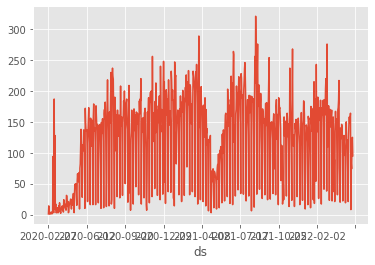

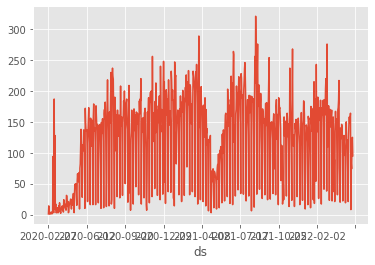

In [ ]:
plt.figure()
df.set_index('ds').y.plot().get_figure()

In [ ]:
train_df=df[(df["ds"]<'2021-12-15')&(df['ds']>'2020-05-10')]
test_df=df[df['ds']>='2021-12-15']
test_df.shape

(143, 2)

In [ ]:
model = Prophet(weekly_seasonality=True)
model.fit(train_df);
model.daily_seasonality
future = model.make_future_dataframe(periods=365, freq = 'd')


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-11,102.838421,74.621005,176.679123,102.838421,102.838421,23.159852,23.159852,23.159852,23.159852,23.159852,23.159852,0.0,0.0,0.0,125.998274
1,2020-05-12,103.046563,79.803521,185.866228,103.046563,103.046563,31.187395,31.187395,31.187395,31.187395,31.187395,31.187395,0.0,0.0,0.0,134.233958
2,2020-05-13,103.254705,77.997206,183.282446,103.254705,103.254705,29.260414,29.260414,29.260414,29.260414,29.260414,29.260414,0.0,0.0,0.0,132.515119
3,2020-05-14,103.462847,76.334506,180.917942,103.462847,103.462847,23.678878,23.678878,23.678878,23.678878,23.678878,23.678878,0.0,0.0,0.0,127.141725
4,2020-05-15,103.670990,70.063193,179.069371,103.670990,103.670990,18.808468,18.808468,18.808468,18.808468,18.808468,18.808468,0.0,0.0,0.0,122.479458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,2022-12-10,119.411299,46.931282,158.978151,105.907967,132.376249,-16.841018,-16.841018,-16.841018,-16.841018,-16.841018,-16.841018,0.0,0.0,0.0,102.570281
944,2022-12-11,119.373713,-44.917914,67.462326,105.760567,132.434078,-109.253989,-109.253989,-109.253989,-109.253989,-109.253989,-109.253989,0.0,0.0,0.0,10.119725
945,2022-12-12,119.336128,89.767659,198.896867,105.613167,132.449069,23.159852,23.159852,23.159852,23.159852,23.159852,23.159852,0.0,0.0,0.0,142.495980
946,2022-12-13,119.298542,93.471769,203.495854,105.465767,132.422811,31.187395,31.187395,31.187395,31.187395,31.187395,31.187395,0.0,0.0,0.0,150.485937


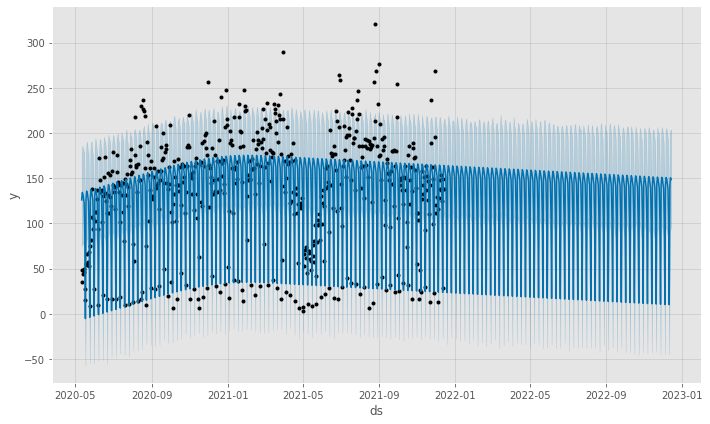

In [ ]:
plot1=model.plot(forecast)

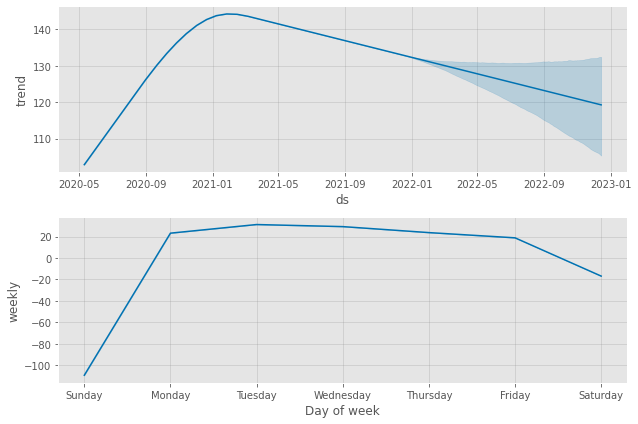

In [ ]:
plot2=model.plot_components(forecast)

In [ ]:
forecast_sub=forecast[["ds","yhat"]]
forecast_sub["ds"]=forecast_sub["ds"].astype(str)
test_df=test_df[['ds','y']]
metrics_df=test_df.merge(forecast_sub,on=['ds'],how='left')
metrics_df['abserror']=abs(metrics_df['y']-metrics_df['yhat'])
metrics_df['daily_df']=1-(metrics_df['abserror']/metrics_df['y'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
total_y=sum(metrics_df['y'])
total_error=sum(metrics_df['abserror'])
forecast_acc=1-(total_error/total_y)
print(forecast_acc)

0.7938783793787793
